 <h1  style="color:green">ANALISIS 60 SEGUNDOS</span>



Que es lo que se pide:

- Vamos a observar <span style="color:green">visitas</span> y <span style="color:green">agendas</span>

- HIPOTESIS: si lo atienden dentro de 60 segundos, es mas propenso a visitar.

- Pedirle a agustin los datos de las llamadas con los horarios y el tiempo de respuesta, mas el resultado de la llamada (si agenda y si visita).

- Comparar rangos de tiempo.

- "mande el primer mensaje, y espere x tiempo a que me atiendan"



- Probabilidad de visita, proporcional a las cantidades de gente que se atiende en menos de 60 segundos o mas.


- Hay datos repetidos, se necesita limpiar esos.

- Trabajo en un principio sin tomar en cuenta las respuestas automaticas de bots.


Se crea el contacto cuando pasa por la publicidad. comparo primera interaccion de salida con cuando se creo el contacto

# ingresosTot
<span style="color:lightgreen">lead_created se crea cada vez que se llena el form </span>

<span style="color:lightgreen">created se llena solo 1 vez, en el primer registro del cliente en la plataforma </span>

# interacciones salientes

<span style="color:lightgreen">fechaHora es cuando se envio el mensaje o el intento de llamada</span>


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import functions as f

### LIMPIEZA

In [2]:
# Rutas de los archivos cargados nuevamente
path_interacciones_llamadas = 'files/interaccionesLlamadas.csv'
path_ingresos_tot = 'files/ingresosTot.csv'

# Leer los archivos CSV
ingresos_tot = pd.read_csv(path_ingresos_tot, low_memory=False)
interacciones_llamadas = pd.read_csv(path_interacciones_llamadas, low_memory=False)

#Filtro respuesta automatica
ingresos_tot = ingresos_tot[~ingresos_tot['agent_email'].str.contains("supervisiondepto5@spazios.com.ar", case=False, na=False)]
interacciones_llamadas = interacciones_llamadas[~interacciones_llamadas['agente'].str.contains("supervisiondepto5@spazios.com.ar", case=False, na=False)]

# Asegurar los tipos correctos para merge
interacciones_llamadas['numCliente'] = interacciones_llamadas['numCliente'].astype(str)
ingresos_tot['last_phone'] = ingresos_tot['last_phone'].astype(str).str.replace(r'\.0$', '', regex=True)

# Realizar el merge con las columnas adicionales
resultante = pd.merge(
    interacciones_llamadas[['numCliente', 'fechaHora']],  
    ingresos_tot[['last_phone', 'lead_created', 'created', 'archivingReason']],  
    left_on='numCliente',  
    right_on='last_phone',
    how='inner' 
)

resultante.to_csv("resultante.csv", index=False)


In [3]:
# Filtrados los duplicados

ingresos = resultante.loc[resultante['archivingReason'] != 'ingresoDuplicado' ]
ingresos = ingresos.loc[ingresos['archivingReason'] != 'inactive']
ingresos = ingresos.loc[ingresos['archivingReason'] != 'noContactable']

# Opcional: Guardar el resultado en un archivo CSV
ingresos.to_csv("resultante.csv", index=False)

# _Ahora lo cruzo con los ultimos 6 digitos de la columna telefono de meetings_


In [4]:
path_meetings = 'files/meetings.csv'

meetings = pd.read_csv(path_meetings,low_memory=False)
## hay mas de un telefono, en dos idiomas obviamente porque por que no
f.combine(meetings)

<h4 style="color:lightgreen">Datasheet de usuarios que agendaron</span>

In [5]:
dfAgenda = pd.merge(
    ingresos[['numCliente', 'fechaHora', 'lead_created', 'created', 'archivingReason']],  
    meetings[['Estado Reunión','Telefono_final']], 
    left_on='numCliente',  
    right_on='Telefono_final',  
    how='inner'  
)


In [6]:
dfSinAgenda = pd.merge(
    ingresos[['numCliente', 'fechaHora', 'lead_created', 'created', 'archivingReason']],  
    meetings[['Telefono_final']],  
    left_on='numCliente', 
    right_on='Telefono_final', 
    how='left',
    indicator=True
)
print(dfSinAgenda)
# Filtrar las filas que están solo en 'ingresos_duplicados' (sin coincidencia)
dfSinAgenda = dfSinAgenda[dfSinAgenda['_merge'] == 'left_only']

# Eliminar la columna '_merge' (opcional)
dfSinAgenda = dfSinAgenda.drop(columns=['_merge'])


       numCliente            fechaHora                      lead_created  \
0          272278  2024-05-02 12:59:32  2024-06-27 15:17:44.643000+00:00   
1          272278  2024-05-02 12:59:32  2024-07-07 19:58:55.660000+00:00   
2          481897  2024-05-02 12:59:15  2024-05-02 15:40:12.413000+00:00   
3          693141  2024-05-02 12:56:58  2024-05-02 02:41:08.055000+00:00   
4          853825  2024-05-02 12:55:34  2024-05-02 00:12:57.328000+00:00   
...           ...                  ...                               ...   
845204     223255  2024-12-30 16:47:19  2024-12-27 13:28:49.467000+00:00   
845205     437915  2024-12-30 16:58:43  2024-12-27 12:04:36.701000+00:00   
845206     437915  2024-12-30 16:59:21  2024-12-27 12:04:36.701000+00:00   
845207     236689  2024-12-30 17:00:44  2024-12-27 16:36:30.689000+00:00   
845208     236689  2024-12-30 17:01:16  2024-12-27 16:36:30.689000+00:00   

                                 created                 archivingReason  \
0       202

In [7]:
dfAgenda["fechaHora"] = pd.to_datetime(dfAgenda["fechaHora"],format="mixed")
dfAgenda["lead_created"] = pd.to_datetime(dfAgenda["lead_created"],format="mixed")
dfAgenda["created"] = pd.to_datetime(dfAgenda["created"],format="mixed")


dfAgenda["lead_created"] = dfAgenda["lead_created"].dt.tz_convert(None)

dfAgenda["created"] = dfAgenda["created"].dt.tz_convert(None)


dfAgenda["lead_created"] = dfAgenda["lead_created"] - pd.Timedelta(hours=3)
dfAgenda["created"] = dfAgenda["created"] - pd.Timedelta(hours=3)

dfAgenda['tiempo_lead'] = dfAgenda['fechaHora'] - dfAgenda['lead_created']
dfAgenda['tiempo_creacion'] = dfAgenda['fechaHora'] - dfAgenda['created']

# Desglose del tiempo transcurrido en días, horas, minutos y segundos
dfAgenda['dias_lead'] = dfAgenda['tiempo_lead'].dt.days
dfAgenda['horas_lead'] = dfAgenda['tiempo_lead'].dt.components.hours
dfAgenda['minutos_lead'] = dfAgenda['tiempo_lead'].dt.components.minutes

dfAgenda['dias_creacion'] = dfAgenda['tiempo_creacion'].dt.days
dfAgenda['horas_creacion'] = dfAgenda['tiempo_creacion'].dt.components.hours
dfAgenda['minutos_creacion'] = dfAgenda['tiempo_creacion'].dt.components.minutes


In [8]:
### ahora para sin agenda
dfSinAgenda["fechaHora"] = pd.to_datetime(dfSinAgenda["fechaHora"],format="mixed")
dfSinAgenda["lead_created"] = pd.to_datetime(dfSinAgenda["lead_created"],format="mixed")
dfSinAgenda["created"] = pd.to_datetime(dfSinAgenda["created"],format="mixed")


dfSinAgenda["lead_created"] = dfSinAgenda["lead_created"].dt.tz_convert(None)
dfSinAgenda["created"] = dfSinAgenda["created"].dt.tz_convert(None)


dfSinAgenda["lead_created"] = dfSinAgenda["lead_created"] - pd.Timedelta(hours=3)
dfSinAgenda["created"] = dfSinAgenda["created"] - pd.Timedelta(hours=3)

dfSinAgenda['tiempo_lead'] = dfSinAgenda['fechaHora'] - dfSinAgenda['lead_created']
dfSinAgenda['tiempo_creacion'] = dfSinAgenda['fechaHora'] - dfSinAgenda['created']

# Desglose del tiempo transcurrido en días, horas, minutos y segundos
dfSinAgenda['dias_lead'] = dfSinAgenda['tiempo_lead'].dt.days
dfSinAgenda['horas_lead'] = dfSinAgenda['tiempo_lead'].dt.components.hours
dfSinAgenda['minutos_lead'] = dfSinAgenda['tiempo_lead'].dt.components.minutes

dfSinAgenda['dias_creacion'] = dfSinAgenda['tiempo_creacion'].dt.days
dfSinAgenda['horas_creacion'] = dfSinAgenda['tiempo_creacion'].dt.components.hours
dfSinAgenda['minutos_creacion'] = dfSinAgenda['tiempo_creacion'].dt.components.minutes


In [9]:
# Filtrar filas donde 'dias_leads' no sea negativo
dfAgenda = dfAgenda[dfAgenda['dias_lead'] >= 0]

# Verificar el resultado
print(dfAgenda['dias_lead'].min())  # Debería ser 0 o mayor


0


In [10]:
# Filtrar filas donde 'dias_leads' no sea negativo
dfSinAgenda = dfSinAgenda[dfSinAgenda['dias_lead'] >= 0]
# Verificar el resultado
print(dfSinAgenda['dias_lead'].min())  # Debería ser 0 o mayor

# Reemplazar valores vacíos o similares por NaN
dfSinAgenda = dfSinAgenda.replace(r'^\s*$', np.nan, regex=True)
dfSinAgenda = dfSinAgenda.dropna(how='all')


0


C:\Users\GiovanniMiceli\AppData\Local\Temp\ipykernel_15828\4093773692.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSinAgenda = dfSinAgenda.replace(r'^\s*$', np.nan, regex=True)


In [11]:
# Asegúrate de que la columna 'tiempo_lead' sea del tipo timedelta
dfAgenda['tiempo_lead'] = pd.to_timedelta(dfAgenda['tiempo_lead'])

# Obtener el índice de la fila con el mínimo valor de 'tiempo_lead' para cada 'numCliente'
indices_minimos = dfAgenda.groupby('numCliente')['tiempo_lead'].idxmin()

# Filtrar las filas correspondientes
minimosAgenda = dfAgenda.loc[indices_minimos]

# Resetear el índice para trabajar con un DataFrame limpio
minimosAgenda = minimosAgenda.reset_index(drop=True)

minimosAgenda = minimosAgenda[minimosAgenda["dias_lead"] < 30]

# Opcional: Guardar en un archivo CSV
minimosAgenda.to_csv("minimosAgenda.csv", index=False)

In [12]:
# Asegúrate de que la columna 'tiempo_lead' sea del tipo timedelta
dfSinAgenda['tiempo_lead'] = pd.to_timedelta(dfSinAgenda['tiempo_lead'])

# Obtener el índice de la fila con el mínimo valor de 'tiempo_lead' para cada 'numCliente'
indices_minimos = dfSinAgenda.groupby('numCliente')['tiempo_lead'].idxmin()

# Filtrar las filas correspondientes
minimosSinAgenda = dfSinAgenda.loc[indices_minimos]

# Resetear el índice para trabajar con un DataFrame limpio
minimosSinAgenda = minimosSinAgenda.reset_index(drop=True)

minimosSinAgenda = minimosSinAgenda[~minimosSinAgenda["archivingReason"].str.contains("visito", na=False)]


minimosSinAgenda = minimosSinAgenda[minimosSinAgenda["dias_lead"] < 30]

# Opcional: Guardar en un archivo CSV
minimosSinAgenda.to_csv("minimosSinAgenda.csv", index=False)

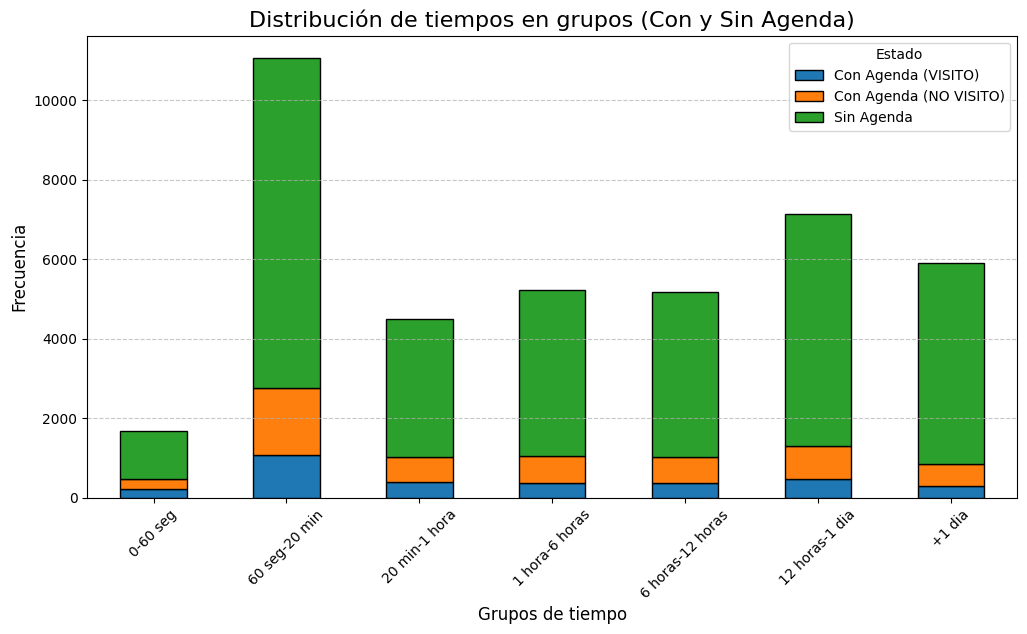

In [13]:
# Crear los límites para los grupos de tiempo (en segundos)
bins = [0,60, 20*60, 60*60,21600,43200,86400, float('inf')]  # Límites en segundos
labels = ['0-60 seg', '60 seg-20 min', '20 min-1 hora','1 hora-6 horas','6 horas-12 horas', '12 horas-1 dia',"+1 dia"]

# Convertir 'tiempo_lead' a segundos
minimosAgenda['tiempo_lead_segundos'] = minimosAgenda['tiempo_lead'].dt.total_seconds()
minimosSinAgenda['tiempo_lead_segundos'] = minimosSinAgenda['tiempo_lead'].dt.total_seconds()

# Crear la columna de grupos en ambos conjuntos
minimosAgenda['grupo_tiempo_lead'] = pd.cut(minimosAgenda['tiempo_lead_segundos'], bins=bins, labels=labels)
minimosSinAgenda['grupo_tiempo_lead'] = pd.cut(minimosSinAgenda['tiempo_lead_segundos'], bins=bins, labels=labels)


# Separar "Con Agenda" en "visitado" y "no visitado"
conAgendaVisita = minimosAgenda[minimosAgenda['Estado Reunión'] == 'REALIZADO']
conAgendaNoVisita = minimosAgenda[minimosAgenda['Estado Reunión'] != 'REALIZADO']

# Contar las ocurrencias en cada grupo para ambos conjuntos
countAgendaVisita = conAgendaVisita['grupo_tiempo_lead'].value_counts(sort=False)
countAgendaNoVisita = conAgendaNoVisita['grupo_tiempo_lead'].value_counts(sort=False)
countNoAgenda = minimosSinAgenda['grupo_tiempo_lead'].value_counts(sort=False)
# Crear un DataFrame con los datos para el gráfico apilado
data = pd.DataFrame({
    'Con Agenda (VISITO)': countAgendaVisita,
    'Con Agenda (NO VISITO)': countAgendaNoVisita,
    'Sin Agenda': countNoAgenda
})
# Graficar el histograma apilado
data.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')
plt.title('Distribución de tiempos en grupos (Con y Sin Agenda)', fontsize=16)
plt.xlabel('Grupos de tiempo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Estado", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [14]:
dataCompleto = data.copy()
# Calcular los totales por grupo
dataCompleto['Total'] = dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)'] + dataCompleto['Sin Agenda']

# Calcular los porcentajes
dataCompleto['% Con Agenda'] = ((dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)']) / dataCompleto['Total']) * 100
dataCompleto['% Sin Agenda'] = (dataCompleto['Sin Agenda'] / dataCompleto['Total']) * 100

dataCompleto["totalAgenda"] = dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)']
dataCompleto[" % visitaron" ] = (dataCompleto['Con Agenda (VISITO)'] /dataCompleto["Total"] )*100
dataCompleto[" % NO visitaron" ] = (dataCompleto['Con Agenda (NO VISITO)'] /dataCompleto["Total"] )*100
print(dataCompleto)


                   Con Agenda (VISITO)  Con Agenda (NO VISITO)  Sin Agenda  \
grupo_tiempo_lead                                                            
0-60 seg                           212                     256        1209   
60 seg-20 min                     1074                    1679        8317   
20 min-1 hora                      400                     626        3481   
1 hora-6 horas                     374                     673        4184   
6 horas-12 horas                   359                     661        4150   
12 horas-1 dia                     479                     815        5841   
+1 dia                             282                     557        5064   

                   Total  % Con Agenda  % Sin Agenda  totalAgenda  \
grupo_tiempo_lead                                                   
0-60 seg            1677     27.906977     72.093023          468   
60 seg-20 min      11070     24.869015     75.130985         2753   
20 min-1 hora       4

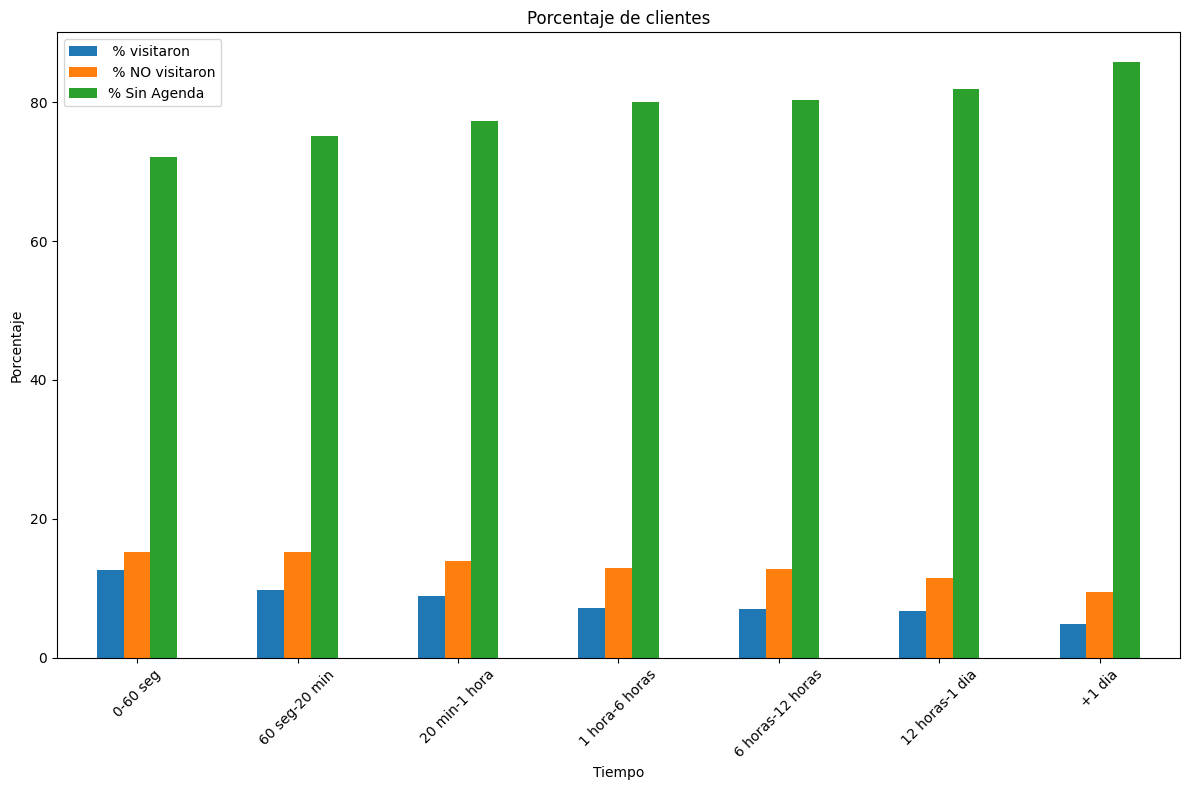

In [15]:
# Seleccionar las columnas de porcentajes
dataPorcentajes = dataCompleto[[' % visitaron', ' % NO visitaron', '% Sin Agenda']]

# Crear el gráfico de barras agrupadas
dataPorcentajes.plot(kind='bar', figsize=(12, 8))


plt.title('Porcentaje de clientes')
plt.xlabel('Tiempo')
plt.ylabel('Porcentaje')
plt.xticks(range(len(dataPorcentajes.index)), dataPorcentajes.index, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


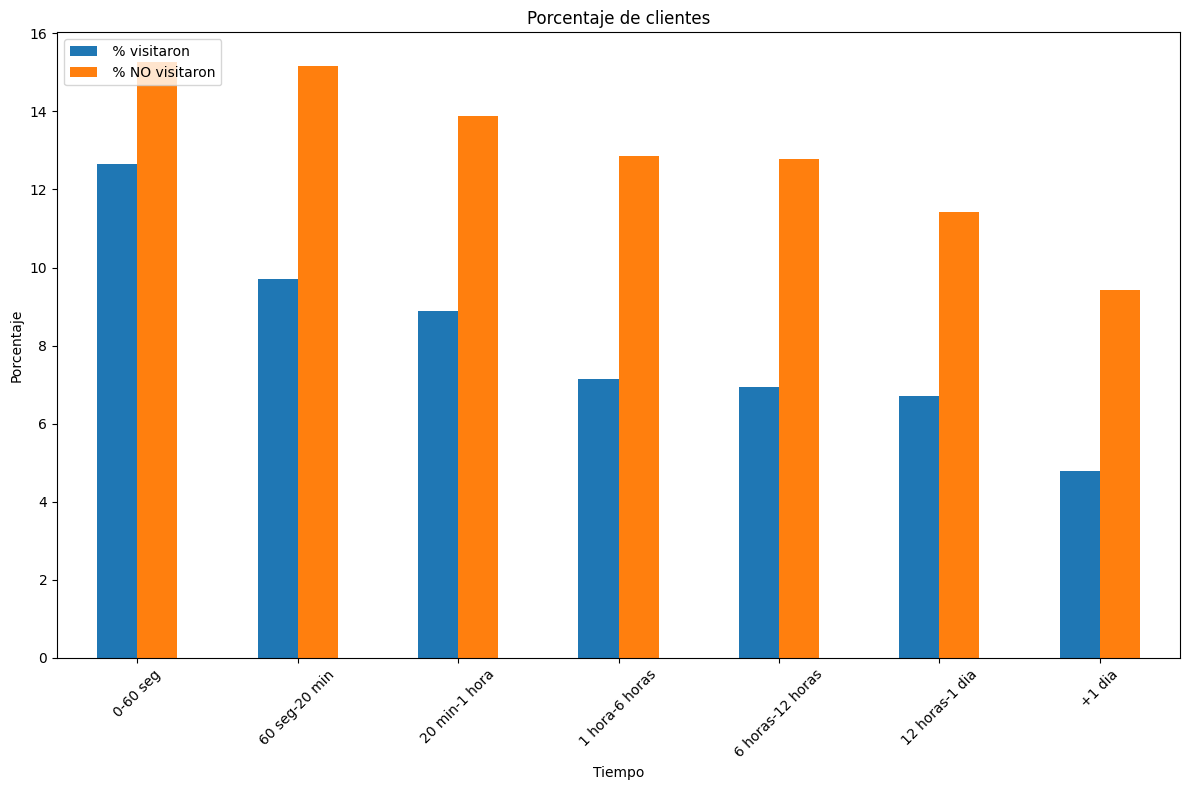

In [16]:
# Seleccionar las columnas de porcentajes
dataPorcentajes = dataCompleto[[' % visitaron', ' % NO visitaron']]

# Crear el gráfico de barras agrupadas
dataPorcentajes.plot(kind='bar', figsize=(12, 8))


plt.title('Porcentaje de clientes')
plt.xlabel('Tiempo')
plt.ylabel('Porcentaje')
plt.xticks(range(len(dataPorcentajes.index)), dataPorcentajes.index, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<h1 style="color:green">Vemos el efecto fuera de horario de atención</h1>

Cruzar con etapa de la noche, separamos los sabados y domingos

In [17]:
#Categorizamos los dias

minimosAgenda["weekend"] = minimosAgenda["lead_created"].dt.day_name()
minimosSinAgenda["weekend"] = minimosSinAgenda["lead_created"].dt.day_name()

dataSemanaAgenda = minimosAgenda.copy()
dataSemanaSinAgenda = minimosSinAgenda.copy()

dataFinDeSemanaAgenda = minimosAgenda.copy()
dataFinDeSemanaSinAgenda = minimosSinAgenda.copy()

## filtro los dias de semana
dataSemanaAgenda = dataSemanaAgenda[~dataSemanaAgenda["weekend"].isin(['Saturday', 'Sunday'])]
dataSemanaSinAgenda = dataSemanaSinAgenda[~dataSemanaSinAgenda["weekend"].isin(['Saturday', 'Sunday'])]

## filtro los dias de semana
dataFinDeSemanaAgenda = dataFinDeSemanaAgenda[dataFinDeSemanaAgenda["weekend"].isin(['Saturday', 'Sunday'])]
dataFinDeSemanaSinAgenda = dataFinDeSemanaSinAgenda[dataFinDeSemanaSinAgenda["weekend"].isin(['Saturday', 'Sunday'])]



<h1 style="color:lightgreen"> Repito el grafico excluyendo fin de semana<h1>

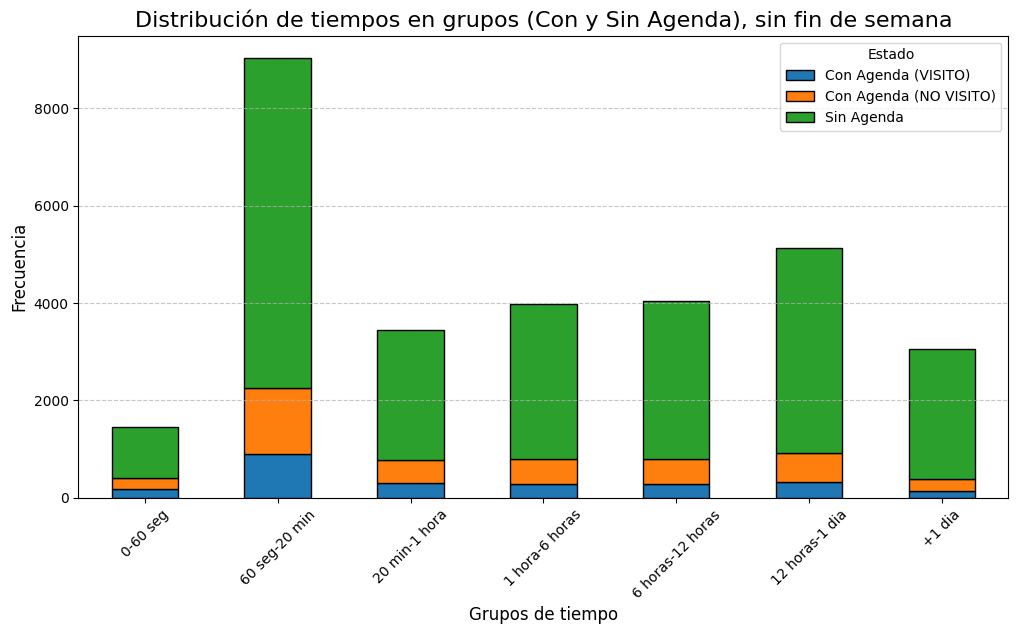

In [18]:
bins = [0, 60, 20*60, 60*60,21600,43200,86400, float('inf')]  # Límites en segundos
labels = ['0-60 seg', '60 seg-20 min', '20 min-1 hora','1 hora-6 horas','6 horas-12 horas', '12 horas-1 dia',"+1 dia"]

# Separar "Con Agenda" en "REALIZADO" y "NO REALIZADO"
conAgendaVisita = dataSemanaAgenda[dataSemanaAgenda['Estado Reunión'] == 'REALIZADO'].copy()
conAgendaNoVisita = dataSemanaAgenda[dataSemanaAgenda['Estado Reunión'] != 'REALIZADO'].copy()

# Contar las ocurrencias en cada grupo para ambos conjuntos
countAgendaVisita = conAgendaVisita['grupo_tiempo_lead'].value_counts(sort=False)
countAgendaNoVisita = conAgendaNoVisita['grupo_tiempo_lead'].value_counts(sort=False)
countNoAgenda = dataSemanaSinAgenda['grupo_tiempo_lead'].value_counts(sort=False)

# Crear un DataFrame con los datos para el gráfico apilado
data = pd.DataFrame({
    'Con Agenda (VISITO)': countAgendaVisita,
    'Con Agenda (NO VISITO)': countAgendaNoVisita,
    'Sin Agenda': countNoAgenda
})

# Graficar el histograma apilado
data.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')
plt.title('Distribución de tiempos en grupos (Con y Sin Agenda), sin fin de semana', fontsize=16)
plt.xlabel('Grupos de tiempo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Estado", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
dataCompletoSinFinde = data
# Calcular los totales por grupo
dataCompletoSinFinde['Total'] = dataCompletoSinFinde['Con Agenda (VISITO)'] + dataCompletoSinFinde['Con Agenda (NO VISITO)'] + data['Sin Agenda']

# Calcular los porcentajes
dataCompletoSinFinde['% Con Agenda'] = ((dataCompletoSinFinde['Con Agenda (VISITO)'] + dataCompletoSinFinde['Con Agenda (NO VISITO)']) / dataCompletoSinFinde['Total']) * 100
dataCompletoSinFinde['% Sin Agenda'] = (dataCompletoSinFinde['Sin Agenda'] / dataCompletoSinFinde['Total']) * 100

dataCompletoSinFinde["totalAgenda"] = dataCompletoSinFinde['Con Agenda (VISITO)'] + dataCompletoSinFinde['Con Agenda (NO VISITO)']
dataCompletoSinFinde[" % visitaron" ] = (dataCompletoSinFinde['Con Agenda (VISITO)'] /dataCompletoSinFinde["Total"] )*100
dataCompletoSinFinde[" % NO visitaron" ] = (dataCompletoSinFinde['Con Agenda (NO VISITO)'] /dataCompletoSinFinde["Total"] )*100
print(dataCompletoSinFinde)

                   Con Agenda (VISITO)  Con Agenda (NO VISITO)  Sin Agenda  \
grupo_tiempo_lead                                                            
0-60 seg                           184                     226        1040   
60 seg-20 min                      895                    1357        6786   
20 min-1 hora                      296                     486        2660   
1 hora-6 horas                     285                     514        3187   
6 horas-12 horas                   280                     517        3236   
12 horas-1 dia                     317                     598        4207   
+1 dia                             133                     257        2659   

                   Total  % Con Agenda  % Sin Agenda  totalAgenda  \
grupo_tiempo_lead                                                   
0-60 seg            1450     28.275862     71.724138          410   
60 seg-20 min       9038     24.917017     75.082983         2252   
20 min-1 hora       3

<h1 style="color:lightgreen" >Repito el grafico solo sabado y domingo</h1>

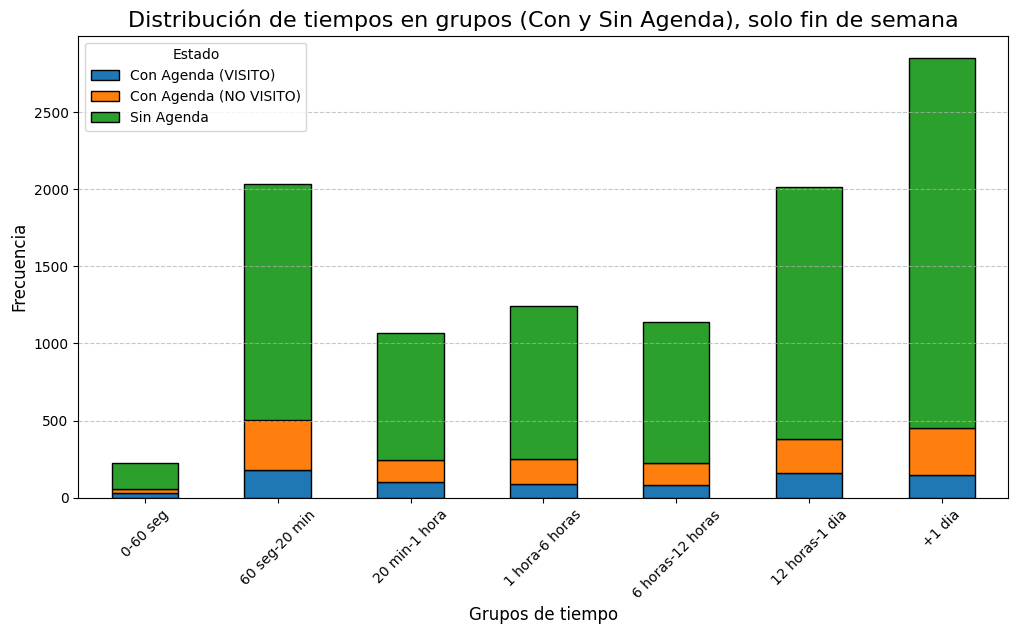

In [20]:
bins = [0, 60, 20*60, 60*60,21600,43200,86400, float('inf')]  # Límites en segundos
labels = ['0-60 seg', '60 seg-20 min', '20 min-1 hora','1 hora-6 horas','6 horas-12 horas', '12 horas-1 dia',"+1 dia"]

# Convertir 'tiempo_lead' a segundos
dataFinDeSemanaAgenda = dataFinDeSemanaAgenda.copy()
dataFinDeSemanaSinAgenda = dataFinDeSemanaSinAgenda.copy()

dataFinDeSemanaAgenda.loc[:, 'tiempo_lead_segundos'] = dataFinDeSemanaAgenda['tiempo_lead'].dt.total_seconds()
dataFinDeSemanaSinAgenda.loc[:, 'tiempo_lead_segundos'] = dataFinDeSemanaSinAgenda['tiempo_lead'].dt.total_seconds()

# Crear la columna de grupos en ambos conjuntos
dataFinDeSemanaAgenda.loc[:, 'grupo_tiempo_lead'] = pd.cut(dataFinDeSemanaAgenda['tiempo_lead_segundos'], bins=bins, labels=labels)
dataFinDeSemanaSinAgenda.loc[:, 'grupo_tiempo_lead'] = pd.cut(dataFinDeSemanaSinAgenda['tiempo_lead_segundos'], bins=bins, labels=labels)

# Separar "Con Agenda" en "REALIZADO" y "NO REALIZADO"
conAgendaVisita = dataFinDeSemanaAgenda[dataFinDeSemanaAgenda['Estado Reunión'] == 'REALIZADO'].copy()
conAgendaNoVisita = dataFinDeSemanaAgenda[dataFinDeSemanaAgenda['Estado Reunión'] != 'REALIZADO'].copy()

# Contar las ocurrencias en cada grupo para ambos conjuntos
countAgendaVisita = conAgendaVisita['grupo_tiempo_lead'].value_counts(sort=False)
countAgendaNoVisita = conAgendaNoVisita['grupo_tiempo_lead'].value_counts(sort=False)
countNoAgenda = dataFinDeSemanaSinAgenda['grupo_tiempo_lead'].value_counts(sort=False)


dataFinde = pd.DataFrame({
    'Con Agenda (VISITO)': countAgendaVisita,
    'Con Agenda (NO VISITO)': countAgendaNoVisita,
    'Sin Agenda': countNoAgenda
})

# Graficar el histograma apilado
dataFinde.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')
plt.title('Distribución de tiempos en grupos (Con y Sin Agenda), solo fin de semana', fontsize=16)
plt.xlabel('Grupos de tiempo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Estado", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
dataCompleto = dataFinde
# Calcular los totales por grupo
dataCompleto['Total'] = dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)'] + dataCompleto['Sin Agenda']

# Calcular los porcentajes
dataCompleto['% Con Agenda'] = ((dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)']) / dataCompleto['Total']) * 100
dataCompleto['% Sin Agenda'] = (dataCompleto['Sin Agenda'] / dataCompleto['Total']) * 100

dataCompleto["totalAgenda"] = dataCompleto['Con Agenda (VISITO)'] + dataCompleto['Con Agenda (NO VISITO)']
dataCompleto[" % visitaron" ] = (dataCompleto['Con Agenda (VISITO)'] /dataCompleto["Total"] )*100
dataCompleto[" % NO visitaron" ] = (dataCompleto['Con Agenda (NO VISITO)'] /dataCompleto["Total"] )*100

print(dataCompleto)

                   Con Agenda (VISITO)  Con Agenda (NO VISITO)  Sin Agenda  \
grupo_tiempo_lead                                                            
0-60 seg                            28                      30         169   
60 seg-20 min                      179                     322        1531   
20 min-1 hora                      104                     140         821   
1 hora-6 horas                      89                     159         997   
6 horas-12 horas                    79                     144         914   
12 horas-1 dia                     162                     217        1634   
+1 dia                             149                     300        2405   

                   Total  % Con Agenda  % Sin Agenda  totalAgenda  \
grupo_tiempo_lead                                                   
0-60 seg             227     25.550661     74.449339           58   
60 seg-20 min       2032     24.655512     75.344488          501   
20 min-1 hora       1

C:\Users\GiovanniMiceli\AppData\Local\Temp\ipykernel_15828\3212001352.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = dataFinDeSemanaAgenda.groupby(['grupo_tiempo', 'Estado Reunión']).size().unstack()
C:\Users\GiovanniMiceli\AppData\Local\Temp\ipykernel_15828\3212001352.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts2 = dataFinDeSemanaSinAgenda.groupby(['grupo_tiempo']).size()
C:\Users\GiovanniMiceli\AppData\Local\Temp\ipykernel_15828\3212001352.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

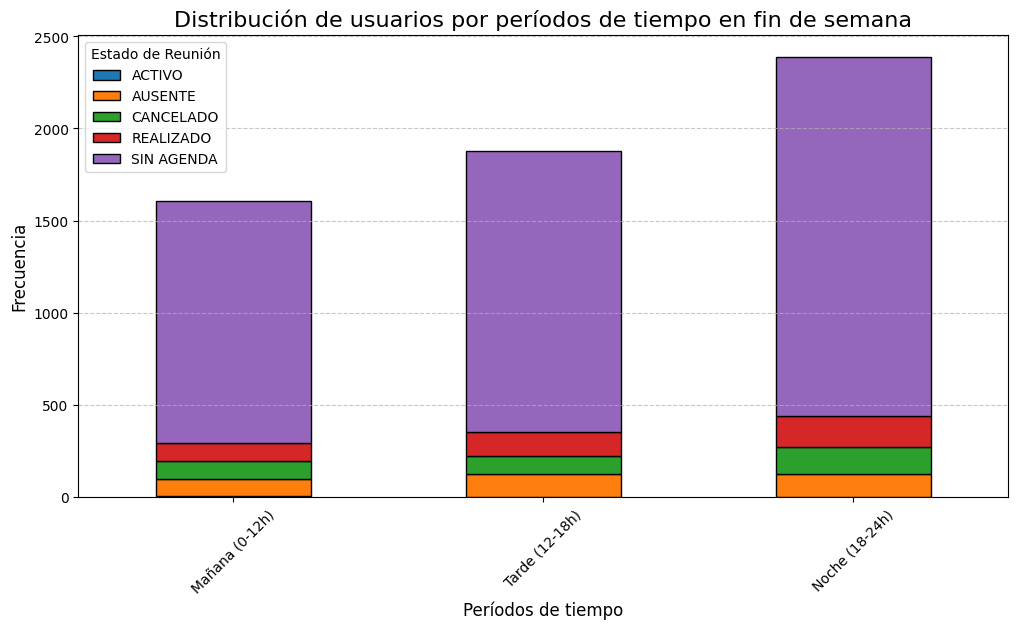

In [22]:
time_bins = [0, 12, 18, 24]  # Horas del día
time_labels = ['Mañana (0-12h)', 'Tarde (12-18h)', 'Noche (18-24h)']

dataFinDeSemanaAgenda['hour'] = dataFinDeSemanaAgenda['lead_created'].dt.hour

dataFinDeSemanaSinAgenda['hour'] = dataFinDeSemanaSinAgenda['lead_created'].dt.hour

# Crear la columna de grupos de tiempo
dataFinDeSemanaAgenda['grupo_tiempo'] = pd.cut(dataFinDeSemanaAgenda['hour'], bins=time_bins, labels=time_labels, right=False)

dataFinDeSemanaSinAgenda['grupo_tiempo'] = pd.cut(dataFinDeSemanaSinAgenda['hour'], bins=time_bins, labels=time_labels, right=False)
dataFinDeSemanaSinAgenda['Estado Reunión'] = 'SIN AGENDA'

# Contar las ocurrencias en cada grupo de tiempo y estado de reunión
counts = dataFinDeSemanaAgenda.groupby(['grupo_tiempo', 'Estado Reunión']).size().unstack()
counts2 = dataFinDeSemanaSinAgenda.groupby(['grupo_tiempo']).size()

df_combined = pd.concat([dataFinDeSemanaAgenda, dataFinDeSemanaSinAgenda], ignore_index=True)
df_combined = df_combined[df_combined['lead_created'].dt.day_name() == 'Sunday']

counts_combined = df_combined.groupby(['grupo_tiempo', 'Estado Reunión']).size().unstack()

# Graficar el histograma de barras
counts_combined.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')
plt.title('Distribución de usuarios por períodos de tiempo en fin de semana', fontsize=16)
plt.xlabel('Períodos de tiempo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Estado de Reunión", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4012
40693
Perderiamos un 9.86% de las entradas


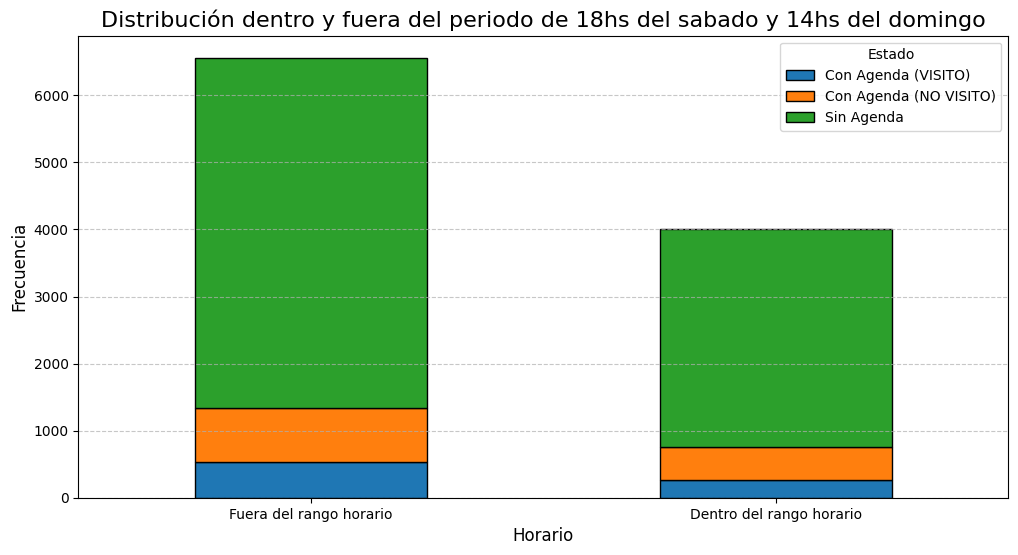

                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   533                     807   
Dentro del rango horario                  257                     505   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         5221   6561     20.423716     79.576284   
Dentro del rango horario        3250   4012     18.993021     81.006979   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1340      8.123762        12.299954  
Dentro del rango horario          762      6.405783        12.587238  


In [23]:
f.hipotesis(dataFinDeSemanaAgenda,dataFinDeSemanaSinAgenda,minimosAgenda,minimosSinAgenda)

## <h2 style="color:white">Repito lo previo para el resto de los dias.</h2>


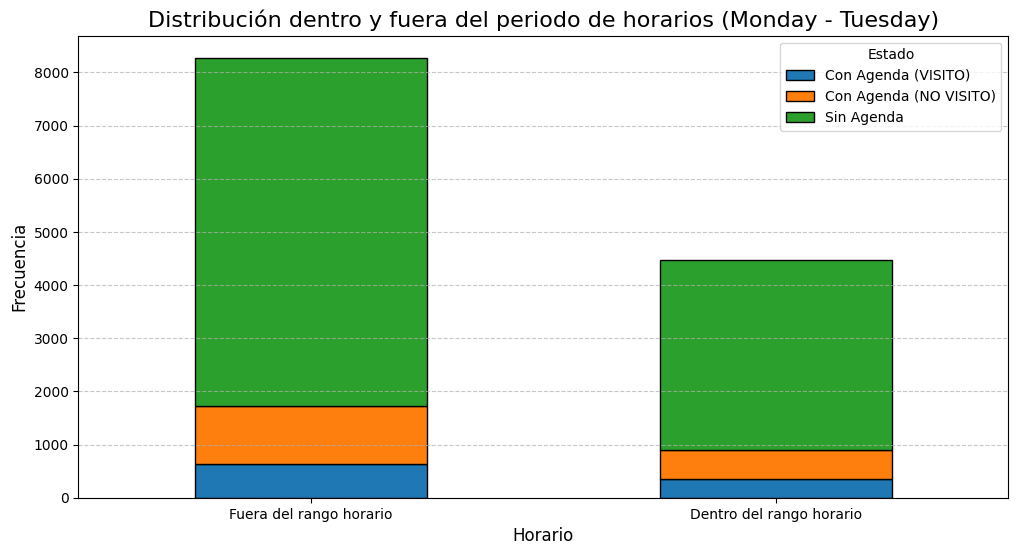


Análisis para Monday - Tuesday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   643                    1084   
Dentro del rango horario                  350                     548   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         6550   8277     20.865048     79.134952   
Dentro del rango horario        3573   4471     20.084992     79.915008   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1727      7.768515        13.096533  
Dentro del rango horario          898      7.828226        12.256766  


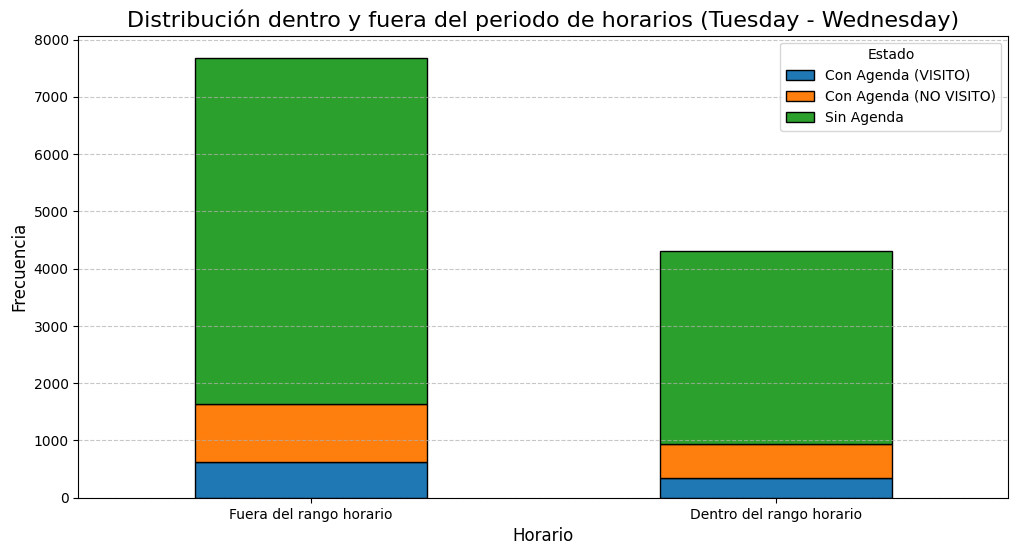


Análisis para Tuesday - Wednesday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   631                    1008   
Dentro del rango horario                  350                     589   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         6044   7683     21.332813     78.667187   
Dentro del rango horario        3362   4301     21.832132     78.167868   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1639      8.212938        13.119875  
Dentro del rango horario          939      8.137642        13.694490  


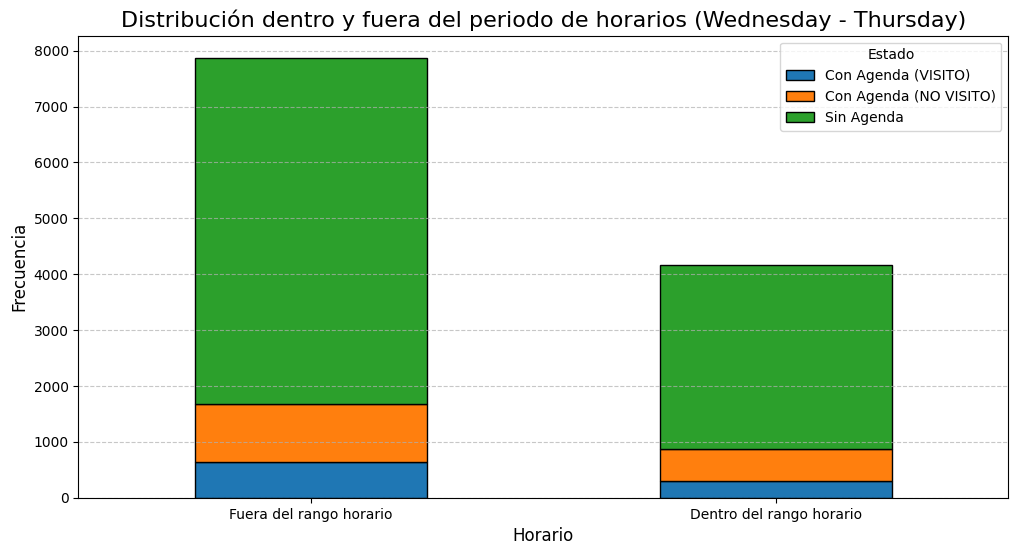


Análisis para Wednesday - Thursday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   640                    1045   
Dentro del rango horario                  294                     586   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         6190   7875     21.396825     78.603175   
Dentro del rango horario        3293   4173     21.087946     78.912054   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1685      8.126984        13.269841  
Dentro del rango horario          880      7.045291        14.042655  


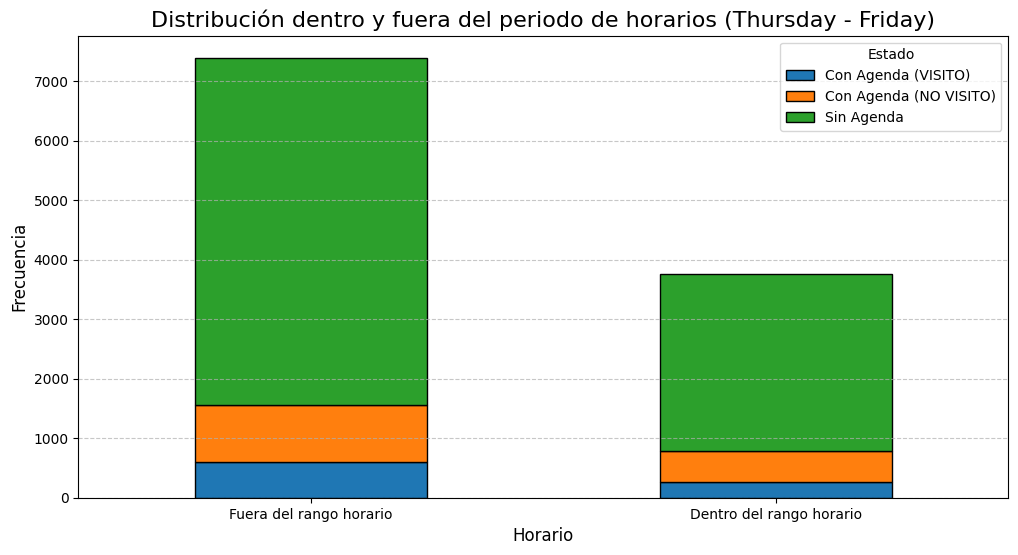


Análisis para Thursday - Friday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   602                     949   
Dentro del rango horario                  264                     523   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         5841   7392     20.982143     79.017857   
Dentro del rango horario        2977   3764     20.908608     79.091392   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1551      8.143939        12.838203  
Dentro del rango horario          787      7.013815        13.894793  


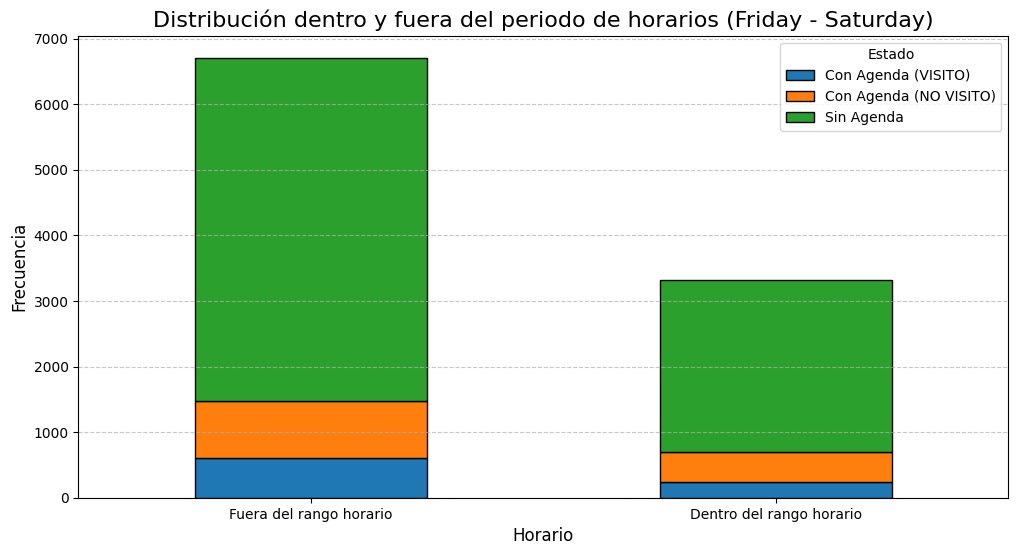


Análisis para Friday - Saturday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   613                     865   
Dentro del rango horario                  242                     448   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         5231   6709     22.030109     77.969891   
Dentro del rango horario        2624   3314     20.820760     79.179240   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1478      9.136980        12.893129  
Dentro del rango horario          690      7.302354        13.518407  


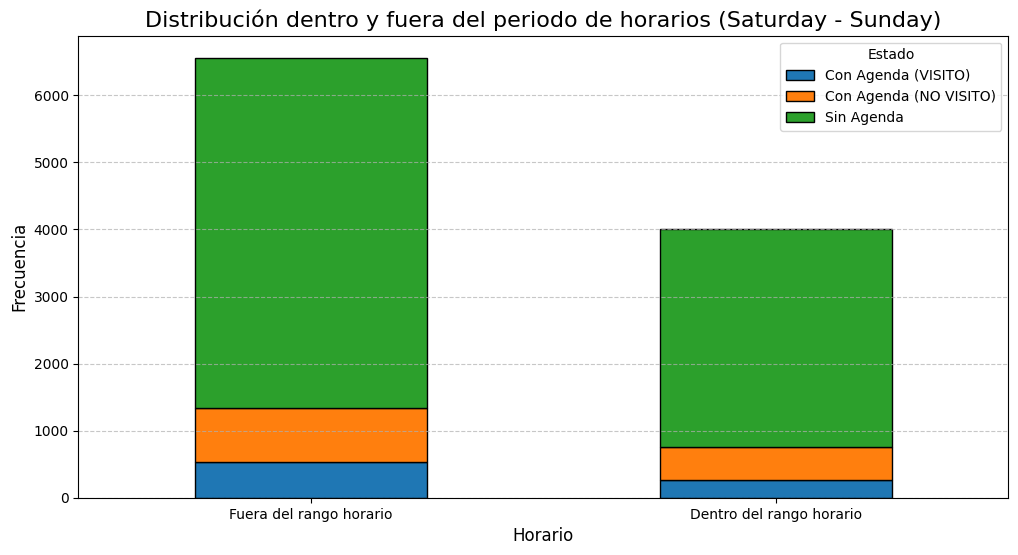


Análisis para Saturday - Sunday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   533                     807   
Dentro del rango horario                  257                     505   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         5221   6561     20.423716     79.576284   
Dentro del rango horario        3250   4012     18.993021     81.006979   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1340      8.123762        12.299954  
Dentro del rango horario          762      6.405783        12.587238  


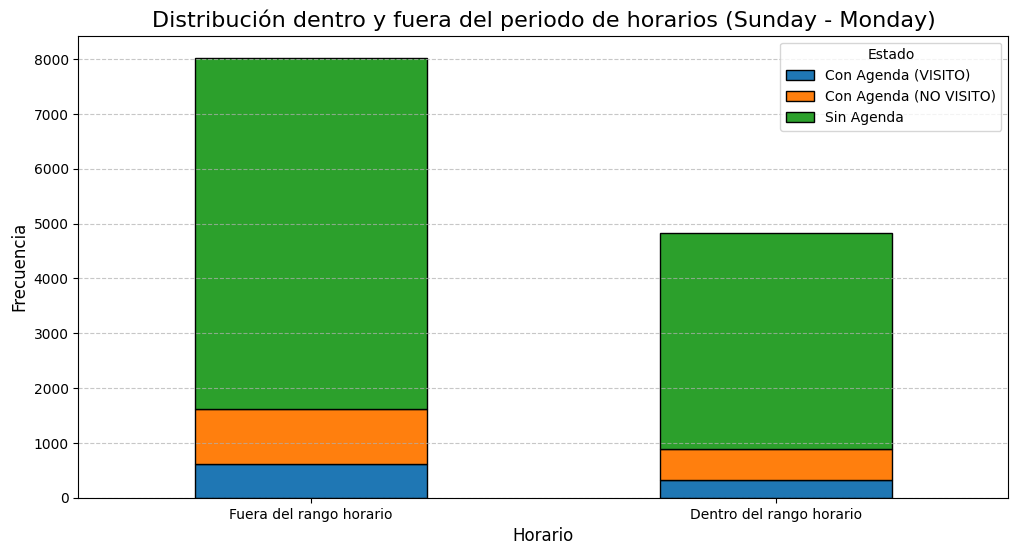


Análisis para Sunday - Monday
                          Con Agenda (VISITO)  Con Agenda (NO VISITO)  \
hipotesis                                                               
Fuera del rango horario                   616                    1006   
Dentro del rango horario                  325                     571   

                          Sin Agenda  Total  % Con Agenda  % Sin Agenda  \
hipotesis                                                                 
Fuera del rango horario         6405   8027     20.206802     79.793198   
Dentro del rango horario        3931   4827     18.562254     81.437746   

                          totalAgenda   % visitaron   % NO visitaron  
hipotesis                                                             
Fuera del rango horario          1622       7.67410        12.532702  
Dentro del rango horario          896       6.73296        11.829294  


In [24]:
f.analizar_horarios_por_pares(minimosAgenda,minimosSinAgenda)

## <h2 style="color:green">Veo cuantos ingresos hay dependiendo de si es horario laboral o no.</h2>

- primero lo hago con los dias de la semana

- Horario laboral del call center, 9 a 21

¿en que ocasiones se atiende fuera de horario? (por ejemplo, 9 pm) ¿ que se tiene que cumplir para que se atienda un sabado?

# <h2 style="color:red">Ver cuales son los minimos y maximos para estudiar la desviacion estandar de los horarios</h2>


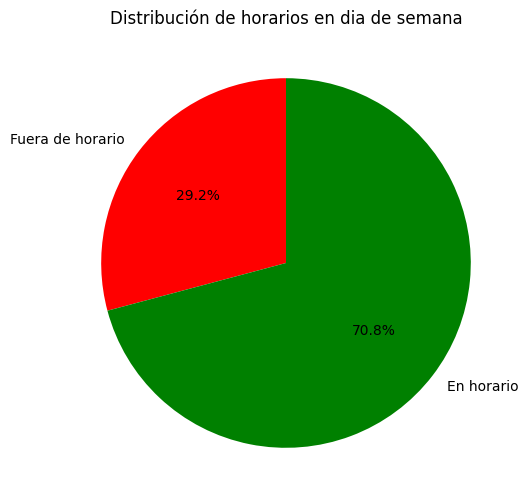

In [25]:
dataSemanaAgenda["fuera_de_horario"] = (dataSemanaAgenda["lead_created"].dt.hour < 9) | ( dataSemanaAgenda["lead_created"].dt.hour >= 21)

labels = ["Fuera de horario","En horario"]
counts = dataSemanaAgenda["fuera_de_horario"].value_counts()
sizes = [counts[True],counts[False]]

# Crear el gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribución de horarios en dia de semana')
plt.show()

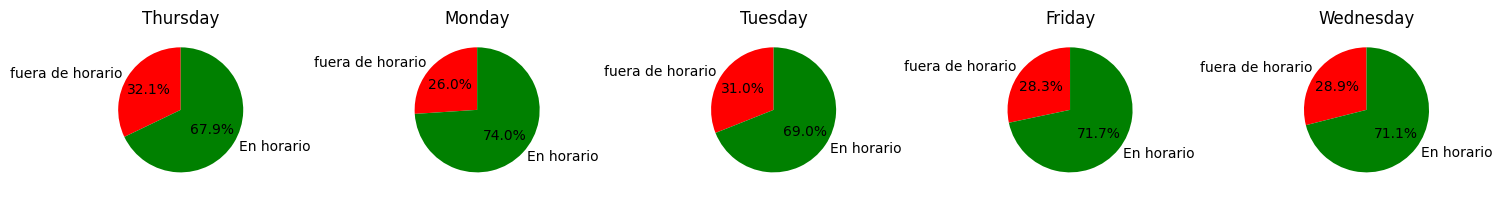

In [26]:
counts = dataSemanaAgenda.groupby('weekend')['fuera_de_horario'].value_counts().unstack(fill_value=0)

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


diasUnicos = dataSemanaAgenda['weekend'].unique()

# Crear la figura con subgráficos
fig, axes = plt.subplots(1, len(diasUnicos), figsize=(15, 5))

# Iterar sobre cada día y generar su pie chart
for ax, dia in zip(axes, diasUnicos):
    counts = dataSemanaAgenda[dataSemanaAgenda['weekend'] == dia]['fuera_de_horario'].value_counts()
    sizes = [counts.get(True, 0), counts.get(False, 0)]
    labels = ['fuera de horario', 'En horario']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    ax.set_title(dia)

# Ajustar el layout
plt.tight_layout()
plt.show()

- Veo cantidad de gente por dia.

- Veo probabilidad de agenda dependiendo si estan fuera o dentro del horario laboral.

Estado Reunión    FALLIDA  REALIZADO
fuera_de_horario                    
False                2773       1722
True                 1182        668


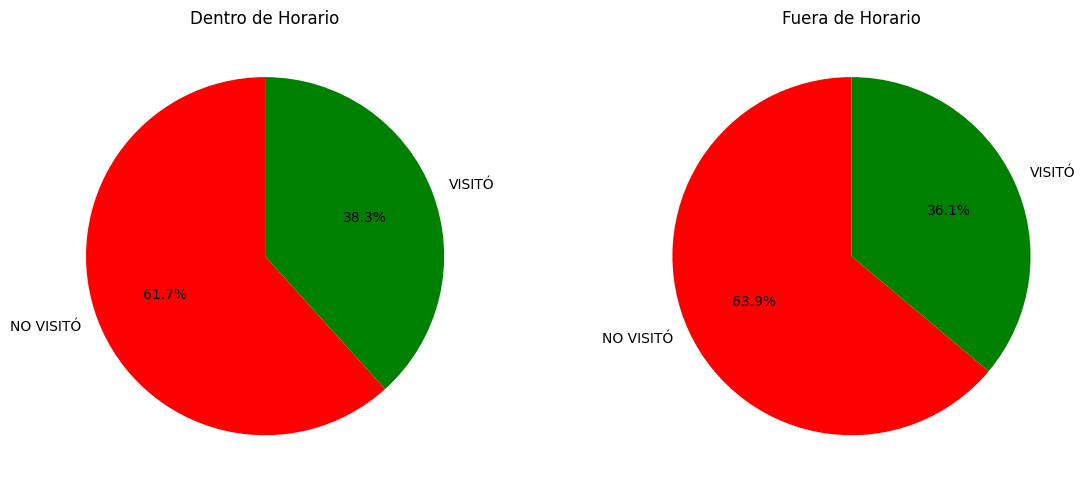

In [27]:
dataSemanaAgenda["Estado Reunión"] = dataSemanaAgenda["Estado Reunión"].replace(['ACTIVO', 'AUSENTE', 'CANCELADO'], 'FALLIDA')
counts = dataSemanaAgenda.groupby('fuera_de_horario')['Estado Reunión'].value_counts().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
print(counts)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
labels=["NO VISITÓ","VISITÓ"]
for ax, (fuera_de_horario, row) in zip(axes, percentages.iterrows()):
    row.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors=['red', 'green'],labels=labels)
    ax.set_title(f'{"Fuera de Horario" if fuera_de_horario else "Dentro de Horario"}')
    ax.set_ylabel('')  # Ocultar la etiqueta del eje Y

plt.tight_layout()
plt.show()

<h2 style="color:green">Ahora veo los fin de semana</h2>

- falta saber los horarios de atencion los fin de semana

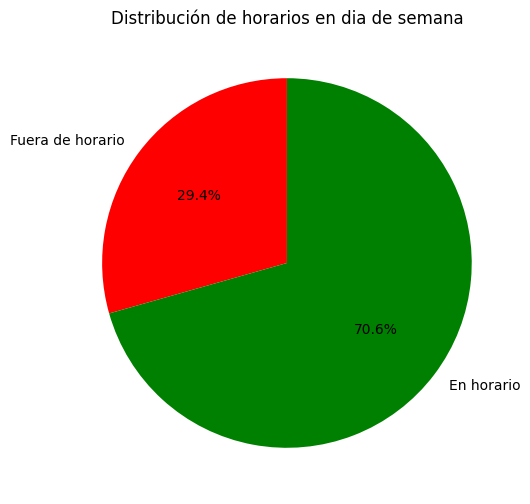

In [28]:
dataFinDeSemanaAgenda["fuera_de_horario"] = (dataFinDeSemanaAgenda["lead_created"].dt.hour < 9) | ( dataFinDeSemanaAgenda["lead_created"].dt.hour >= 21)

labels = ["Fuera de horario","En horario"]
counts = dataFinDeSemanaAgenda["fuera_de_horario"].value_counts()
sizes = [counts[True],counts[False]]

# Crear el gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribución de horarios en dia de semana')
plt.show()

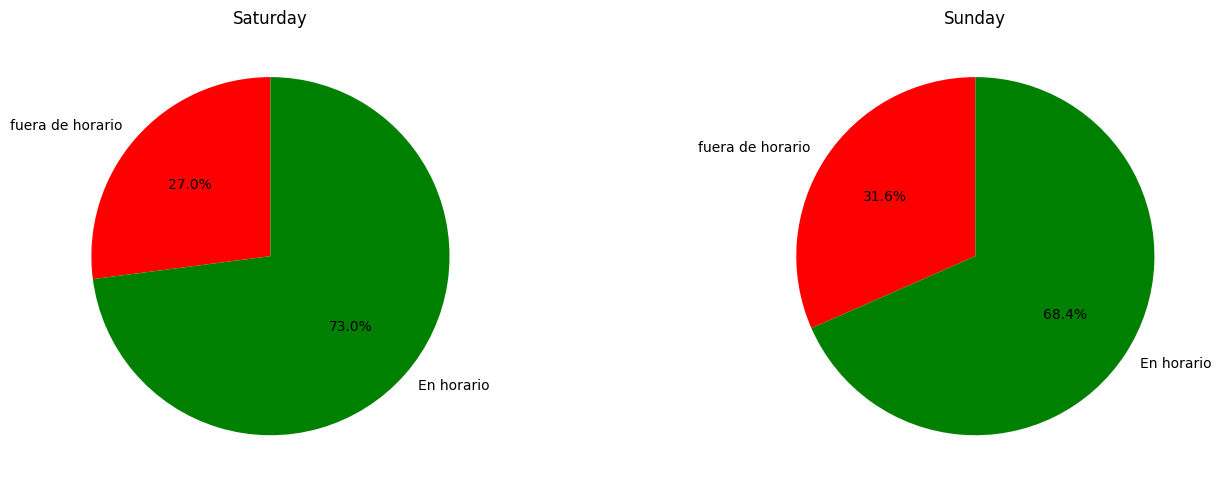

In [29]:
counts = dataFinDeSemanaAgenda.groupby('weekend')['fuera_de_horario'].value_counts().unstack(fill_value=0)

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


diasUnicos = dataFinDeSemanaAgenda['weekend'].unique()

# Crear la figura con subgráficos
fig, axes = plt.subplots(1, len(diasUnicos), figsize=(15, 5))

# Iterar sobre cada día y generar su pie chart
for ax, dia in zip(axes, diasUnicos):
    counts = dataFinDeSemanaAgenda[dataFinDeSemanaAgenda['weekend'] == dia]['fuera_de_horario'].value_counts()
    sizes = [counts.get(True, 0), counts.get(False, 0)]
    labels = ['fuera de horario', 'En horario']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    ax.set_title(dia)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [30]:
print(dataFinDeSemanaAgenda["weekend"].value_counts())

weekend
Sunday      1089
Saturday    1013
Name: count, dtype: int64


Estado Reunión    FALLIDA  REALIZADO
fuera_de_horario                    
False                 905        579
True                  407        211


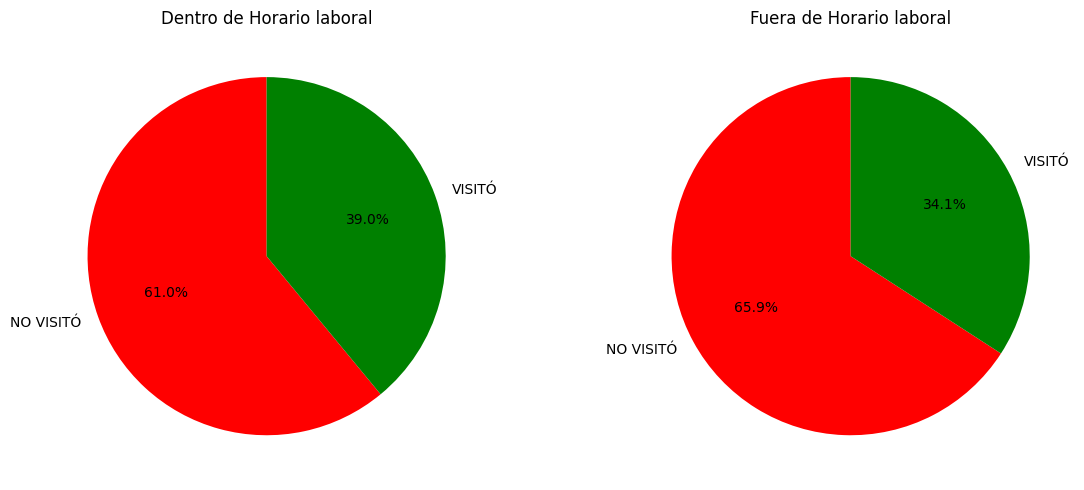

In [31]:
dataFinDeSemanaAgenda["Estado Reunión"] = dataFinDeSemanaAgenda["Estado Reunión"].replace(['ACTIVO', 'AUSENTE', 'CANCELADO'], 'FALLIDA')
counts = dataFinDeSemanaAgenda.groupby('fuera_de_horario')['Estado Reunión'].value_counts().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
print(counts)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
labels=["NO VISITÓ","VISITÓ"]

for ax, (fuera_de_horario, row) in zip(axes, percentages.iterrows()):
    row.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors=['red', 'green'],labels=labels)
    ax.set_title(f'{"Fuera de Horario laboral" if fuera_de_horario else "Dentro de Horario laboral"}')
    ax.set_ylabel('')  # Ocultar la etiqueta del eje Y

plt.tight_layout()
plt.show()

<h1 style="color:lightgreen">Empezamos devuelta, volvemos con los datasets originales pero ahora nos concentramos en llamadas</h1>

- Queremos ver cual es la media de las duraciones de llamadas exitosas (producieron visitas)

In [32]:
# Rutas de los archivos cargados nuevamente
path_interacciones_llamadas = 'files/interaccionesLlamadas.csv'
path_meetings = 'files/meetings.csv'

# Leer los archivos CSV
meetings = pd.read_csv(path_meetings,low_memory=False)
interacciones_llamadas = pd.read_csv(path_interacciones_llamadas, low_memory=False)

interacciones_llamadas = interacciones_llamadas[~interacciones_llamadas['agente'].str.contains("supervisiondepto5@spazios.com.ar", case=False, na=False)]

# Asegurar los tipos correctos para merge
interacciones_llamadas['numCliente'] = interacciones_llamadas['numCliente'].astype(str)



- Cruzamos con la gente que fue a una visita

- Saco los que estan activos

In [33]:
f.combine(meetings)

- Cruzamos los datos

- Filtro los de duracion 0

In [34]:
efectivasTotal = pd.merge(
    interacciones_llamadas[['numCliente', 'fechaHora','duracion','agente','id',"tipo"]],  
    meetings[['Telefono_final', 'Tipo de Visita', 'Origen', 'Created Time','Title',"Estado Reunión"]],  
    left_on='numCliente',  
    right_on='Telefono_final',
    how='inner' 
)

efectivasTotal = efectivasTotal.drop('numCliente',axis = 1)

- No elimine la gente que no vino a la visita, veo a la gente que agendó completa.

- Una idea seria sumar todos los horarios de charlas que pasaron el mismo dia, pero eso rompe el scope de ver cuanto tiempo tiene que hablar un operador con la persona para concretar y que vengan.

- Necesito generar confianza en los datos, sino no voy a poder realizar ningun analisis.

- identificar si la cantidad de llamadas tiene una correlacion con visitas.

- Corroborar si dura 4 minutos la gente que mejor rendimiento tiene.

- Separamos los mejores, los del medio y los malos.

- Para separarlos, uso el valor "Created Time" como valor limite de tiempo, y a partir de eso miro el fechaHora maximo sin pasarme de este limite impuesto

In [35]:
efectivasTotalFiltrados = f.filterBeforeCreatedTime(efectivasTotal)

efectivasTotalFinal = efectivasTotalFiltrados.loc[efectivasTotalFiltrados.groupby("Telefono_final")["fechaHora"].idxmax()]


<h2 style ="color:lightgreen">Ahora necesito agrupar en mails para ver los success rates de los asesores</h2>

In [36]:
successRateCompleto = f.successRate(efectivasTotalFinal)

<h1 style="color:lightgreen">Repito solo para llamadas y solo para interacciones</h1>

In [37]:
llamadasEfectivasFinal = efectivasTotalFinal[efectivasTotalFinal["tipo"].str.contains("llamada", case=False, na=False)]

successRateLLamadas = f.successRate(llamadasEfectivasFinal)

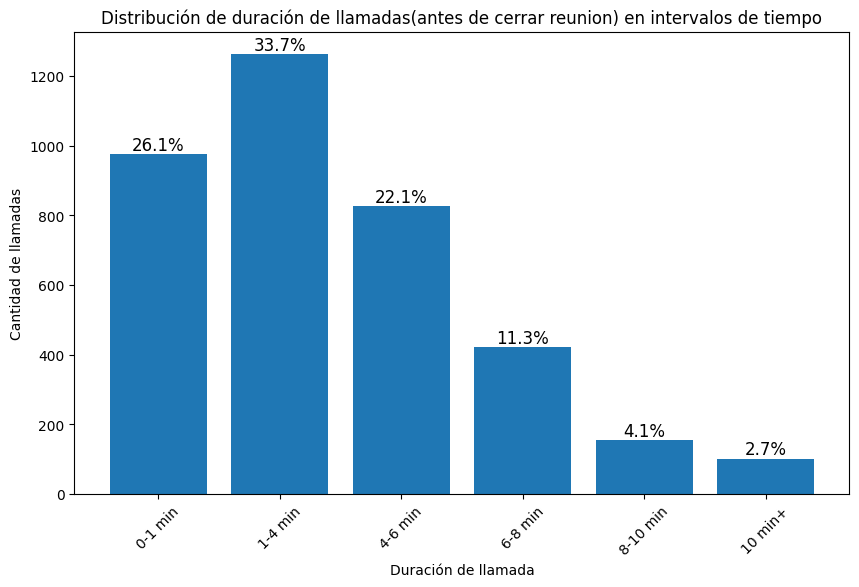

In [38]:
f.graphDurations('Distribución de duración de llamadas(antes de cerrar reunion) en intervalos de tiempo',llamadasEfectivasFinal.copy(),False)

In [39]:
##SAMPLEAMOS

llamadasEfectivasFinal["Telefono_final"].sample(10)

249398    483530
270620    391566
299683    053064
286075    062805
237754    766923
239752    266671
268223    957632
314947    088209
243442    408768
259872    565359
Name: Telefono_final, dtype: object

In [40]:
interaccionesEfectivasFinal = efectivasTotalFinal[efectivasTotalFinal["tipo"].str.contains("interaccion", case=False, na=False)]

successRateInteracciones = f.successRate(interaccionesEfectivasFinal)


<h1 style="color:lightgreen">Quiero ver que tan dispuestos estan a atender a la gente cuando se las llama de una, para eso veo el primer llamado de la interaccion total</h1>

In [ ]:
llamadas = interacciones_llamadas

primerContacto = pd.merge(
    llamadas[['numCliente', 'fechaHora','duracion','agente',"tipo"]],  
    meetings[['Telefono_final', 'Tipo de Visita', 'Origen', 'Created Time','Title',"Estado Reunión"]],  
    left_on='numCliente',  
    right_on='Telefono_final',
    how='inner' 
)
primerContacto = primerContacto.drop('numCliente',axis = 1)

filtrado = f.filterBeforeCreatedTime(primerContacto)

primerContactoFiltrado = filtrado.loc[filtrado.groupby("Telefono_final")["fechaHora"].idxmin()]
## me quedo con las llamadas solo despues de filtrar los minimos

primerContactoFiltradoLLamada = primerContactoFiltrado[primerContactoFiltrado["tipo"].str.contains("llamada", case=False, na=False)]

primerContactoFiltradoInteraccion = primerContactoFiltrado[primerContactoFiltrado["tipo"].str.contains("interaccion", case=False, na=False)]

- Grafico interaccion

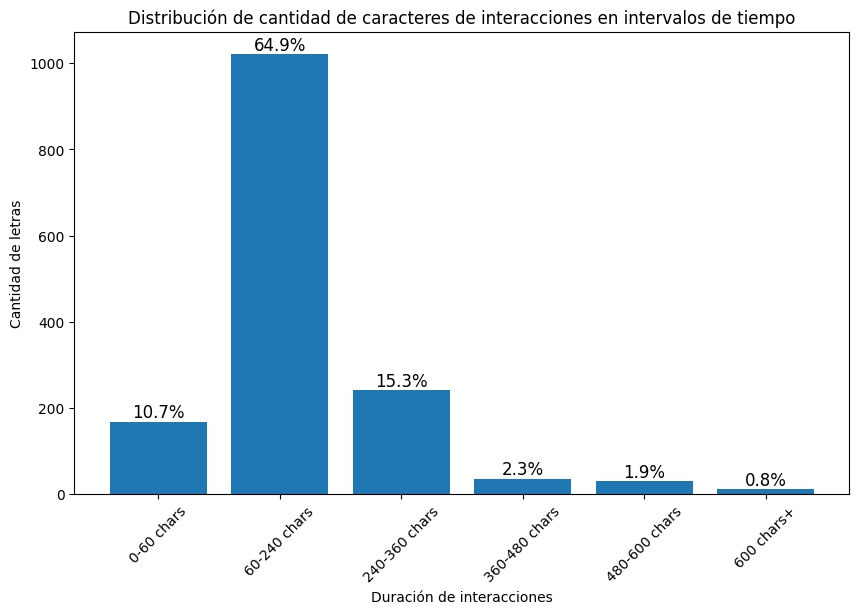

In [42]:
f.graphDurations("Distribución de cantidad de caracteres de interacciones en intervalos de tiempo",primerContactoFiltradoInteraccion.copy(),True)

- Grafico llamadas

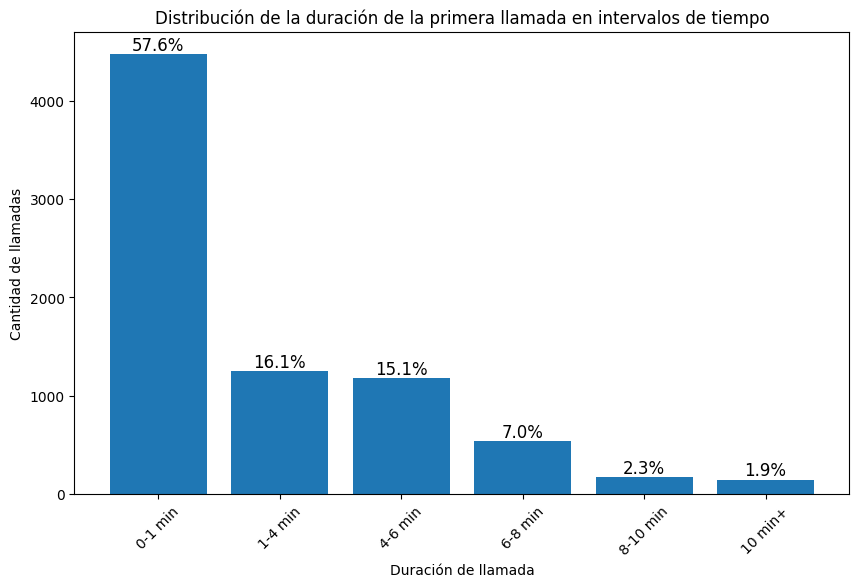

In [43]:
f.graphDurations('Distribución de la duración de la primera llamada en intervalos de tiempo',primerContactoFiltradoLLamada.copy(),False)

<h1 style="color:green">Empezamos devuelta, Vemos conversion rate por origen.</h1>

 - la idea es ver un poco la conversion (CVR) por origen.

 - Identificar los origenes con mayor tasa de conversion.

 - De ahi, estudiar la fase del recorrido de venta en la cual el lead accede y determinar su influencia en la conversion.

 Como hago esta ultima parte de la fase del recorrido?

Descartando los que tienen 1 contacto.

- CARGA_MANUAL(CARGA MANUAL) tiene un CVR de 32,25%, 11 visitas de 34 contactos.

- Autoagenda_web_sp(AUTOAGENDA) tiene un CVR de 32,26%, 10 visitas de 31 contactos.

- Autoagenda_02(AUTOAGENDA) tiene un CVR de 22,45%,22 visitas de 98 contactos.

- instagram(WHASTAPP) tiene un CVR de 13,66%,28 visitas de 205 contactos.

- SC_SP_GBA_CONTADO_MIRAGE_45K(LEAD-GEN) tiene un CVR de 11,76%, 8 visitas de 68 contactos.

### Quiero ver solo los datos de zenvia


In [31]:
import pandas as pd
datosZenvia = pd.read_csv("files\ingresosTot.csv")
datosZenvia = datosZenvia.drop(["index","id","origenWP"],axis = 1)
datosZenvia = datosZenvia.dropna(subset=["archivingReason"])
datosZenvia = datosZenvia.dropna(subset=["last_phone"])
datosZenvia = datosZenvia[datosZenvia["archivingReason"] != "ingresoDuplicado"]

datosZenvia = datosZenvia.sort_values(by="lead_created", ascending=False).drop_duplicates(subset="last_phone", keep="first")
datosZenvia["lead_created"] = pd.to_datetime(datosZenvia["lead_created"],format="mixed")

datosZenvia["dia"] = datosZenvia["lead_created"].dt.day_name()
datosZenvia = datosZenvia[datosZenvia["dia"] != "Sunday"]
datosZenvia = datosZenvia[datosZenvia["dia"] != "Saturday"]
datosZenvia["lead_created"] = datosZenvia["lead_created"] - pd.Timedelta(hours=3)


### Separo entre dias laborales y dias no laborales

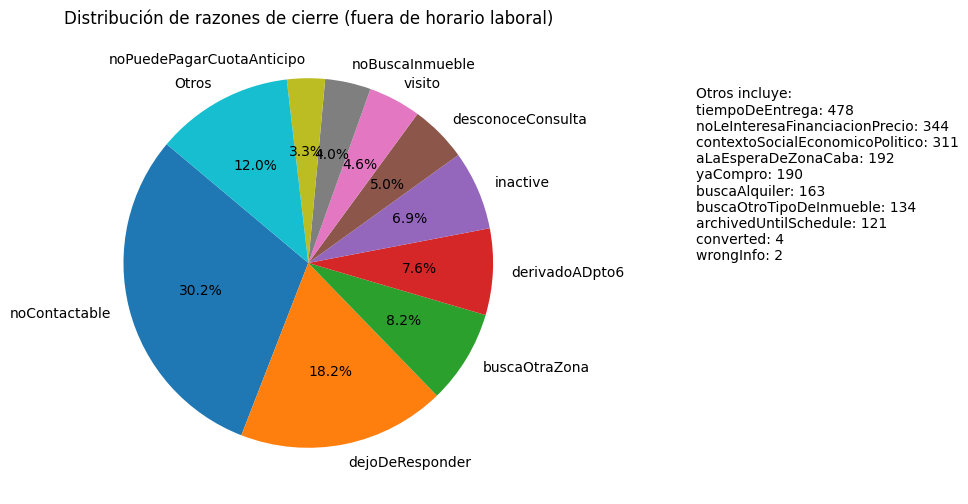

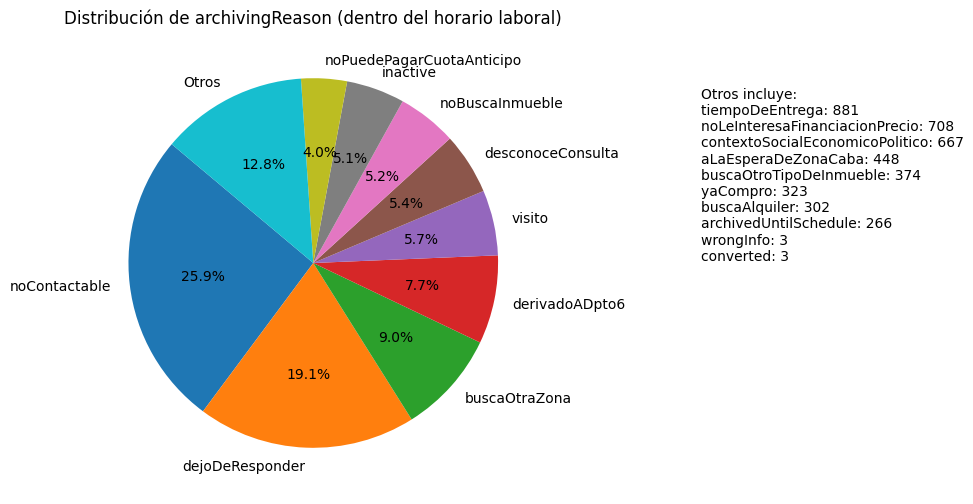

In [32]:
datosZenvia["noLaboral"] = (datosZenvia["lead_created"].dt.hour < 9) | ( datosZenvia["lead_created"].dt.hour >= 21)

import matplotlib.pyplot as plt
def plot_pie_chart(data, title):
    total = data.sum()
    threshold = total * 0.03  # 1% del total

    # Separar categorías menores al 1%
    small_categories = data[data < threshold]
    data = data[data >= threshold]

    # Agregar la categoría "Otros"
    if small_categories.sum() > 0:
        data["Otros"] = small_categories.sum()

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(
        data, labels=data.index, autopct='%1.1f%%', startangle=140
    )
    plt.title(title)

    # Agregar leyenda para la categoría "Otros"
    if "Otros" in data.index:
        legend_text = "\n".join([f"{cat}: {count}" for cat, count in small_categories.items()])
        plt.figtext(0.9, 0.5, f"Otros incluye:\n{legend_text}", fontsize=10, ha="left")

    plt.show()

# Filtrar datos
df_true = datosZenvia[datosZenvia["noLaboral"] == True]["archivingReason"].value_counts()
df_false = datosZenvia[datosZenvia["noLaboral"] == False]["archivingReason"].value_counts()

# Generar gráficos
plot_pie_chart(df_true, "Distribución de razones de cierre (fuera de horario laboral)")
plot_pie_chart(df_false, "Distribución de archivingReason (dentro del horario laboral)")


In [41]:
ausentes = pd.read_csv("files\meetings.csv")
ausentes = ausentes[ausentes["Estado Reunión"] == "AUSENTE"]
ausentes = ausentes.drop("Record Id (Meetings - Potentials)",axis = 1)
f.combine(ausentes)
ausentes = ausentes.drop(["Telefono","Phone","Movil","Mobile","ID Sirena"],axis = 1)
ausentes

,Record Id,Record Id (Meetings - Leads),Title,Created Time,Estado Reunión,From,Origen,Tipo de Visita,ID Sirena (Meetings - Leads),Telefono_final
125,zcrm_922151000258918335,zcrm_922151000258610898,Shopping Devoto - Facundo Claros,22/01/2025 20:56,AUSENTE,23/01/2025 11:00,Sirena,Shopping Devoto,678fdffecf38fcdbc4e996fd,593922
221,zcrm_922151000258726702,zcrm_922151000258581141,Shopping Devoto - Martin Ullua,21/01/2025 22:01,AUSENTE,22/01/2025 19:00,Sirena,Shopping Devoto,678ed623fb1813c20df82e63,951946
226,zcrm_922151000258630192,zcrm_922151000258523440,- Margarita Estrada,21/01/2025 09:41,AUSENTE,21/01/2025 10:00,Sirena,NaN,678e6c0b88be939542f5fbcf,780971
228,zcrm_922151000258630073,zcrm_922151000258412834,Shopping Devoto - Laura Spinelli,21/01/2025 09:05,AUSENTE,21/01/2025 14:00,Sirena,Shopping Devoto,6787ef0a239a76063faed6a9,492662
234,zcrm_922151000258623105,zcrm_922151000258612153,Presencial - Daiana Bernardez,21/01/2025 09:34,AUSENTE,21/01/2025 19:00,Sirena,Presencial,678ea88e8669c1ce866d2d60,551760
...,...,...,...,...,...,...,...,...,...,...
16183,zcrm_922151000223923663,zcrm_922151000223736015,Reconfirmado - Shopping Devoto - Mabel Emilse ...,02/05/2024 10:09,AUSENTE,04/05/2024 19:00,Sirena,Shopping Devoto,6629664553da680008f5dae8,187637
16185,zcrm_922151000223922936,zcrm_922151000127966691,Reconfirmado - Recoleta - Juan Carlos Cruz,02/05/2024 20:38,AUSENTE,06/05/2024 14:00,Sirena,Recoleta,62e702be9739af00094c652e,631247
16195,zcrm_922151000223920527,zcrm_922151000223925562,amenabar - Zulma Ramirez,02/05/2024 09:17,AUSENTE,06/05/2024 16:00,Sirena,Amenábar,66337e35e07d3500089a032e,400965
16199,zcrm_922151000223919875,zcrm_922151000223957891,Reconfirmado - Shopping Devoto - Andrea Antuarez,02/05/2024 17:52,AUSENTE,03/05/2024 10:00,Sirena,Shopping Devoto,6633fb76224287000879d560,671988
